In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("temperature.csv")
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [3]:
df.shape

(7752, 25)

We have 7752 rows and 25 columns in df dataset

In [4]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

These are the total columns present in the dataset,where we have two target variables- 'Next_Tmax' & 'Next_Tmin'

In [5]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

Here we have float and string type data,hence encoding needs to be applied

In [6]:
df.Next_Tmax.value_counts()

29.3    113
33.0    106
31.3    104
29.6    101
31.2     98
       ... 
37.3      1
37.6      1
19.7      1
21.5      1
38.7      1
Name: Next_Tmax, Length: 183, dtype: int64

In [7]:
df.Next_Tmin.value_counts()

23.5    159
23.4    157
24.0    156
23.2    150
23.8    149
       ... 
29.5      1
13.6      1
13.3      1
13.9      1
12.9      1
Name: Next_Tmin, Length: 157, dtype: int64

We have float type data present in our both target variable,hence we will apply regression here

In [8]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

We have null values present in our dataset

# APPLY ENCODING

In [9]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [10]:
df

station   Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0  290.0          28.7          21.4    58.255688    91.116364   
1         2.0  290.0          31.9          21.6    52.263397    90.604721   
2         3.0  290.0          31.6          23.3    48.690479    83.973587   
3         4.0  290.0          32.0          23.4    58.239788    96.483688   
4         5.0  290.0          31.4          21.9    56.174095    90.155128   
...       ...    ...           ...           ...          ...          ...   
7747     23.0  304.0          23.3          17.1    26.741310    78.869858   
7748     24.0  304.0          23.3          17.7    24.040634    77.294975   
7749     25.0  304.0          23.2          17.4    22.933014    77.243744   
7750      NaN    NaN          20.0          11.3    19.794666    58.936283   
7751      NaN    NaN          37.6          29.9    98.524734   100.000153   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  ...  \
0            28.074101         23.006936   6.818887   69.451805  ...   
1            29.850689         24.035009   5.691890   51.937448  ...   
2            30.091292         24.565633   6.138224   20.573050  ...   
3            29.704629         23.326177   5.650050   65.727144  ...   
4            29.113934         23.486480   5.735004  107.965535  ...   
...                ...               ...        ...         ...  ...   
7747         26.352081         18.775678   6.148918   72.058294  ...   
7748         27.010193         18.733519   6.542819   47.241457  ...   
7749         27.939516         18.522965   7.289264    9.090034  ...   
7750         17.624954         14.272646   2.882580  -13.603212  ...   
7751         38.542255         29.619342  21.857621  213.414006  ...   

      LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0       0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1       0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2       0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3       0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4       0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...          ...         ...         ...      ...      ...       ...   
7747    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [11]:
df.dtypes

station             float64
Date                float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

We have converted the datas to float type by using  OrdinalEncoder

# TREATING THE NAN VALUES

In [12]:
df=df.replace(np.nan,0)

In [13]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

Nan values are no longer present in the dataset 

# STATISTICAL SUMMARY

In [14]:
df.describe()

station         Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
count  7752.000000  7752.000000   7752.000000   7752.000000  7752.000000   
mean     12.996646   154.460139     29.499407     23.015338    56.210230   
std       7.213660    89.517454      4.083116      3.256071    15.618676   
min       0.000000     0.000000      0.000000      0.000000     0.000000   
25%       7.000000    77.000000     27.700000     21.600000    45.735368   
50%      13.000000   154.000000     29.900000     23.400000    54.828714   
75%      19.000000   232.000000     32.000000     24.900000    67.038254   
max      25.000000   309.000000     37.600000     29.900000    98.524734   

       LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS  \
count  7752.000000       7752.000000       7752.000000  7752.000000   
mean     87.519784         29.326939         23.285106     7.029203   
std      11.227876          4.123757          3.277967     2.281613   
min       0.000000          0.000000          0.000000     0.000000   
25%      84.038809         27.601014         22.032374     5.647741   
50%      89.699505         29.662273         23.735942     6.531345   
75%      93.704500         31.683819         25.134000     8.007471   
max     100.000153         38.542255         29.619342    21.857621   

          LDAPS_LH  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7752.000000  ...  7752.000000  7752.000000  7752.000000  7752.000000   
mean     61.900288  ...     0.480310     0.275508     0.266801    37.544722   
std      34.120103  ...     1.754900     1.156495     1.200654     0.050352   
min     -13.603212  ...     0.000000     0.000000     0.000000    37.456200   
25%      36.776474  ...     0.000000     0.000000     0.000000    37.510200   
50%      56.487289  ...     0.000000     0.000000     0.000000    37.550700   
75%      83.904586  ...     0.016748     0.007231     0.000000    37.577600   
max     213.414006  ...    21.621661    15.841235    16.655469    37.645000   

               lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7752.000000  7752.000000  7752.000000      7752.000000  7752.000000   
mean    126.991397    61.867972     1.257048      5341.502803    30.169440   
std       0.079435    54.279780     1.370444       429.158867     3.596114   
min     126.826000    12.370000     0.098475      4329.520508     0.000000   
25%     126.937000    28.700000     0.271300      4999.018555    28.200000   
50%     126.995000    45.716000     0.618000      5436.345215    30.500000   
75%     127.042000    59.832400     1.767800      5728.316406    32.600000   
max     127.135000   212.335000     5.178230      5992.895996    38.900000   

         Next_Tmin  
count  7752.000000  
mean     22.852348  
std       2.827042  
min       0.000000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 25 columns]

Here is the statistical summary of df dataset

Key observation:
 
 1. The mean higher than the median(50th percentile) in columns 'LDAPS_RHmin','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','DEM','Slope',skewness might be present in these columns
 2. we observe extreme difference between the 75th percentile and max in column 'DEM',outliers can be present in these columns

# DATA VISUALIZATION 

To check he missing values

<AxesSubplot:>

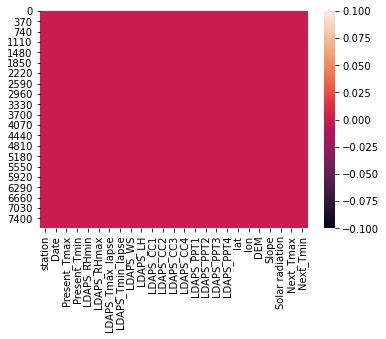

In [15]:
sns.heatmap(df.isnull())

No missing values are present in df dataset

# To check the correlation

In [16]:
cor=df.corr()
cor

station      Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000  0.000802      0.093484      0.109070    -0.062429   
Date              0.000802  1.000000     -0.100147     -0.077356    -0.082955   
Present_Tmax      0.093484 -0.100147      1.000000      0.796060    -0.167379   
Present_Tmin      0.109070 -0.077356      0.796060      1.000000     0.042678   
LDAPS_RHmin      -0.062429 -0.082955     -0.167379      0.042678     1.000000   
LDAPS_RHmax      -0.106065 -0.051928     -0.190934     -0.087845     0.619118   
LDAPS_Tmax_lapse  0.049270 -0.146358      0.258220      0.181450    -0.125199   
LDAPS_Tmin_lapse  0.074748 -0.158082      0.277778      0.330684     0.309329   
LDAPS_WS          0.003936 -0.060044     -0.104266     -0.056121     0.370372   
LDAPS_LH         -0.131658 -0.026919      0.091490     -0.018650    -0.001355   
LDAPS_CC1         0.006642 -0.039590     -0.232985      0.047237     0.616968   
LDAPS_CC2         0.003128 -0.022375     -0.171536      0.042993     0.738195   
LDAPS_CC3         0.000361 -0.059735     -0.126714     -0.029631     0.683737   
LDAPS_CC4         0.005734 -0.044841     -0.129399     -0.064573     0.518152   
LDAPS_PPT1       -0.005411 -0.029714     -0.077180      0.083750     0.256015   
LDAPS_PPT2       -0.010980 -0.014392     -0.075777      0.045526     0.374882   
LDAPS_PPT3       -0.015526 -0.000777     -0.086998     -0.034823     0.233215   
LDAPS_PPT4       -0.013516 -0.039520     -0.082853     -0.057832     0.165342   
lat              -0.237456 -0.000052     -0.030749     -0.050726     0.081402   
lon              -0.118591  0.000061      0.011455     -0.027258    -0.071251   
DEM              -0.256155 -0.000414     -0.132419     -0.181700     0.095443   
Slope            -0.090492 -0.000449     -0.064182     -0.095836     0.115658   
Solar radiation  -0.018798 -0.432937     -0.024520      0.033574     0.245973   
Next_Tmax         0.103471 -0.100948      0.471320      0.384234    -0.403276   
Next_Tmin         0.122164 -0.110984      0.473728      0.588769     0.039808   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.106065          0.049270          0.074748  0.003936   
Date                -0.051928         -0.146358         -0.158082 -0.060044   
Present_Tmax        -0.190934          0.258220          0.277778 -0.104266   
Present_Tmin        -0.087845          0.181450          0.330684 -0.056121   
LDAPS_RHmin          0.619118         -0.125199          0.309329  0.370372   
LDAPS_RHmax          1.000000          0.372350          0.489207  0.316808   
LDAPS_Tmax_lapse     0.372350          1.000000          0.824795  0.002716   
LDAPS_Tmin_lapse     0.489207          0.824795          1.000000  0.125638   
LDAPS_WS             0.316808          0.002716          0.125638  1.000000   
LDAPS_LH             0.287786          0.159654          0.031520  0.060898   
LDAPS_CC1            0.381210         -0.212644          0.103823  0.314795   
LDAPS_CC2            0.350814         -0.274477          0.128112  0.287388   
LDAPS_CC3            0.239198         -0.294763          0.056062  0.267462   
LDAPS_CC4            0.171274         -0.222670          0.023888  0.243670   
LDAPS_PPT1           0.194093         -0.057927          0.048090  0.154384   
LDAPS_PPT2           0.166798         -0.153120          0.019615  0.190944   
LDAPS_PPT3           0.103924         -0.117201         -0.046515  0.161133   
LDAPS_PPT4           0.092030         -0.098521         -0.051957  0.143897   
lat                  0.124812         -0.029935         -0.068535  0.034917   
lon                  0.016358          0.064481         -0.019014 -0.056643   
DEM                  0.112953         -0.127217         -0.139151  0.181986   
Slope                0.140001         -0.115436         -0.132310  0.163485   
Solar radiation      0.133827          0.069409          0.149156  0.131265   
Next_Tmax       

<AxesSubplot:>

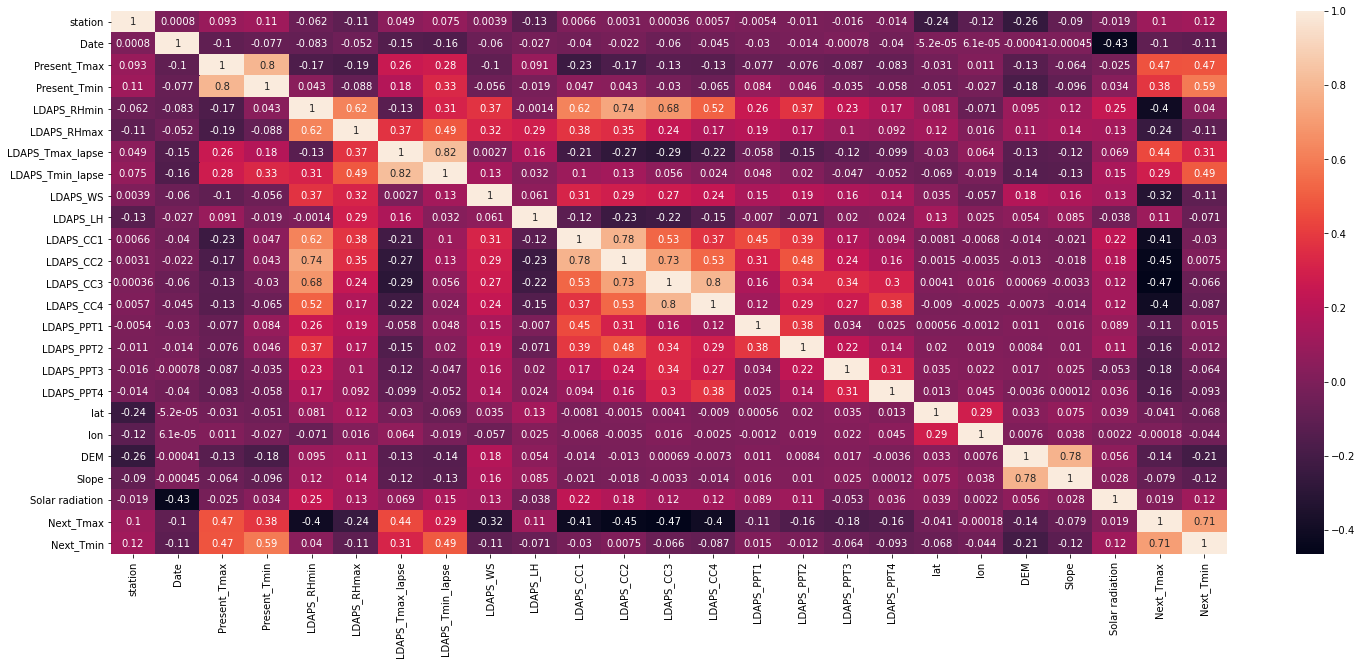

In [17]:
plt.figure(figsize=(25,10))
sns.heatmap(cor,annot=True)

Observation:
    
Light shades are highly correlated and dark shades are negatively correated 
    
"Next_Tmax" is highly negatively correlated with column 'LDAPS_RHmin','LDAPS_RHmax', 'LDAPS_WS', 'LDAPS_CC1', 'LDAPS_CC2','LDAPS_CC3','LDAPS_CC4'


our 2nd target variable 'Next_Tmin' is negatively correated with column 'DEM','LDAPS_RHmax','LDAPS_RHmin'

# PLOTTING OUTLIERS

station                AxesSubplot(0.125,0.749828;0.133621x0.130172)
Date                AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Present_Tmax         AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Present_Tmin        AxesSubplot(0.606034,0.749828;0.133621x0.130172)
LDAPS_RHmin         AxesSubplot(0.766379,0.749828;0.133621x0.130172)
LDAPS_RHmax            AxesSubplot(0.125,0.593621;0.133621x0.130172)
LDAPS_Tmax_lapse    AxesSubplot(0.285345,0.593621;0.133621x0.130172)
LDAPS_Tmin_lapse     AxesSubplot(0.44569,0.593621;0.133621x0.130172)
LDAPS_WS            AxesSubplot(0.606034,0.593621;0.133621x0.130172)
LDAPS_LH            AxesSubplot(0.766379,0.593621;0.133621x0.130172)
LDAPS_CC1              AxesSubplot(0.125,0.437414;0.133621x0.130172)
LDAPS_CC2           AxesSubplot(0.285345,0.437414;0.133621x0.130172)
LDAPS_CC3            AxesSubplot(0.44569,0.437414;0.133621x0.130172)
LDAPS_CC4           AxesSubplot(0.606034,0.437414;0.133621x0.130172)
LDAPS_PPT1          AxesSubplot(0.

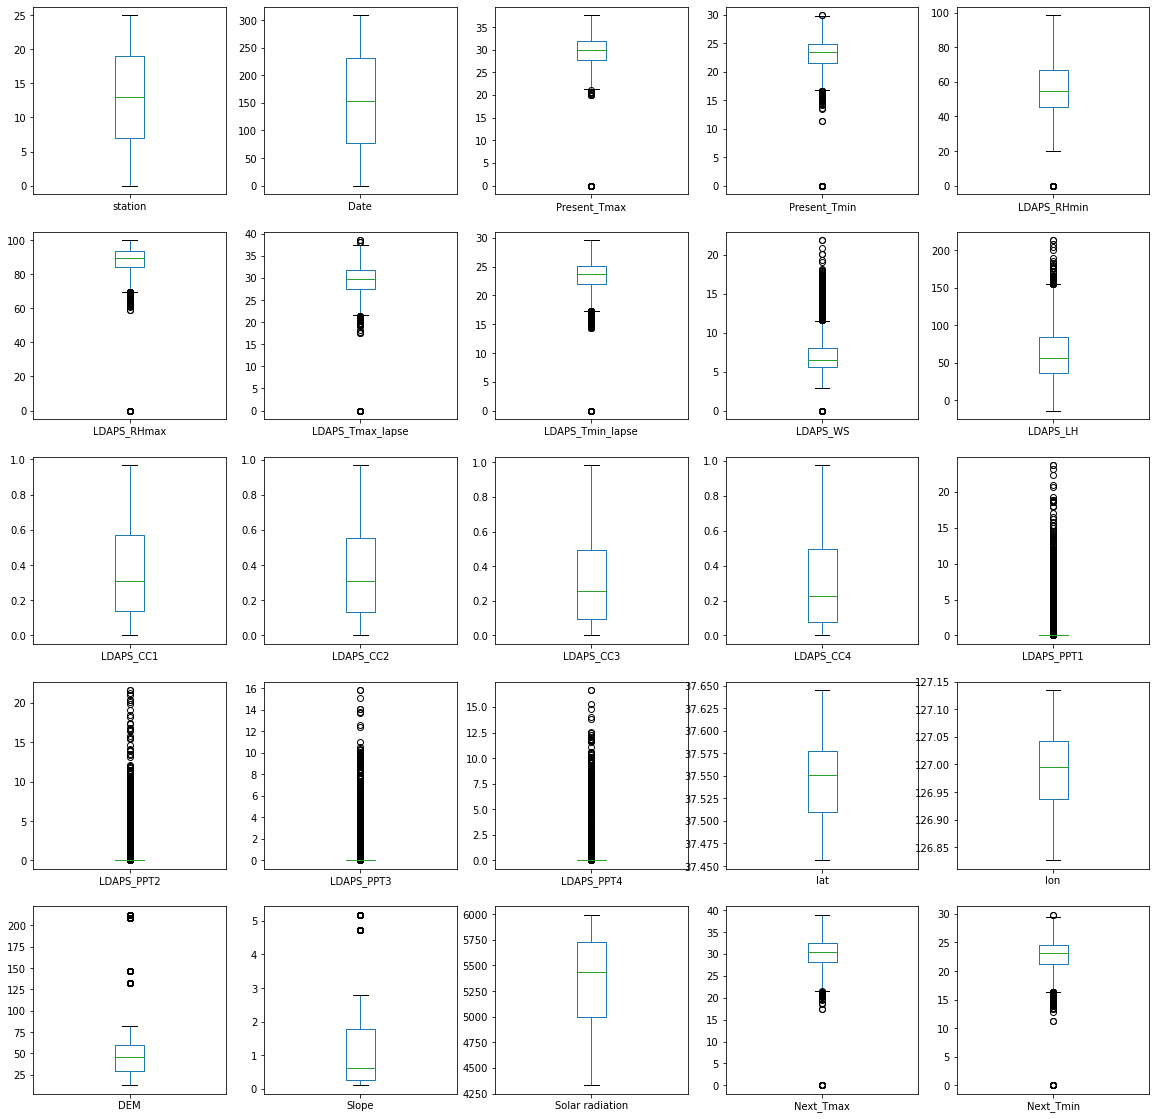

In [20]:
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(20,20))    

outliers are present in 'Present_Tmax', 'Present_Tmin','LDAPS_RHmin','LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS','LDAPS_LH','LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','DEM', 'Slope','Next_Tmax', 'Next_Tmin'

In [22]:
df.drop(["LDAPS_CC1","LDAPS_CC3","LDAPS_CC4","LDAPS_PPT3","DEM"],axis=1,inplace=True)

"LDAPS_CC1","LDAPS_CC3","LDAPS_CC4","LDAPS_PPT3","DEM" columns are showing negative correlation with both the target variable 

In [23]:
df.shape

(7752, 20)

Dropped columns are no longer present in the dataset 

# TO CHECK THE DISTRIBUTION OF DATA IN COLUMNS

<AxesSubplot:xlabel='station', ylabel='Density'>

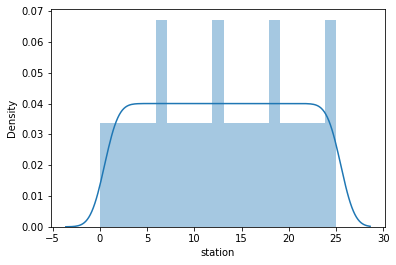

In [25]:
sns.distplot(df["station"])

in "station" column datas are equally distributed

<AxesSubplot:xlabel='Date', ylabel='Density'>

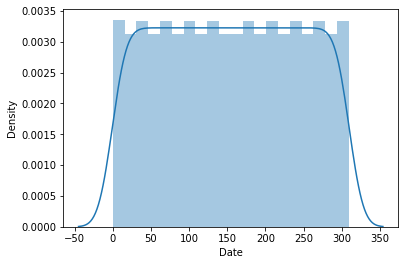

In [26]:
sns.distplot(df["Date"])

in "Date" column datas are equally distributed

<AxesSubplot:xlabel='Present_Tmax', ylabel='Density'>

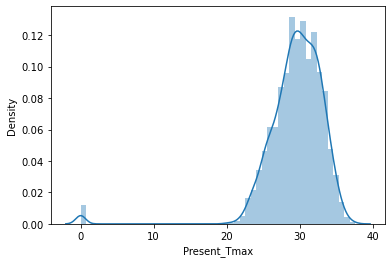

In [27]:
sns.distplot(df["Present_Tmax"])

skewness is present in the "Present_Tmax" column

<AxesSubplot:xlabel='Present_Tmin', ylabel='Density'>

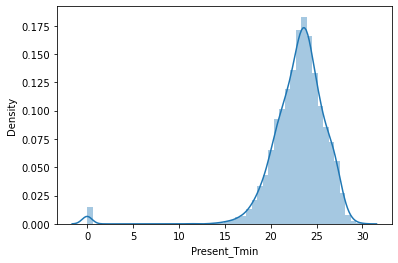

In [28]:
sns.distplot(df["Present_Tmin"])

skewness is present in the "Present_Tmin" column

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Density'>

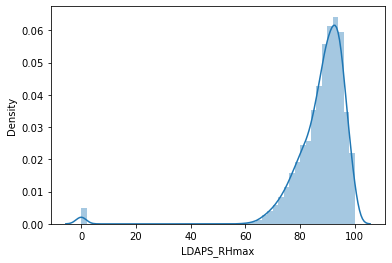

In [30]:
sns.distplot(df["LDAPS_RHmax"])

skewness is present in the "LDAPS_RHmax" column

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Density'>

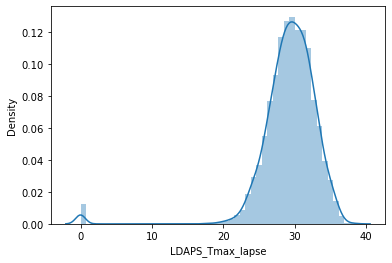

In [31]:
sns.distplot(df["LDAPS_Tmax_lapse"])

skewness is present in the "LDAPS_Tmax_lapse" column

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Density'>

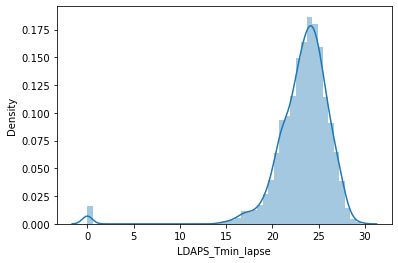

In [32]:
sns.distplot(df["LDAPS_Tmin_lapse"])

skewness is present in the "LDAPS_Tmin_lapse" column

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Density'>

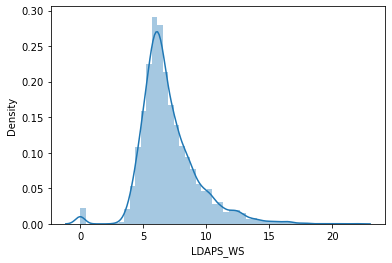

In [33]:
sns.distplot(df["LDAPS_WS"])

skewness is present in the "LDAPS_WS" column

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Density'>

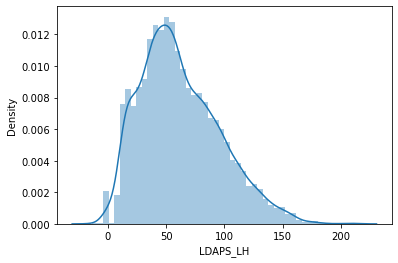

In [34]:
sns.distplot(df["LDAPS_LH"])

datas are equally distributed in the column

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Density'>

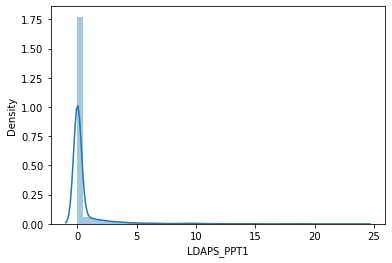

In [36]:
sns.distplot(df["LDAPS_PPT1"])

skewness is present in the "LDAPS_PPT1" column

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Density'>

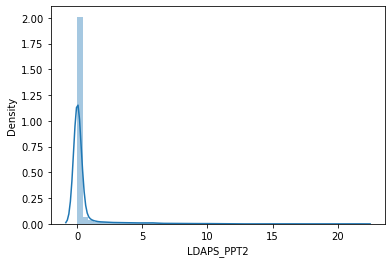

In [37]:
sns.distplot(df["LDAPS_PPT2"])

skewness is present in the "LDAPS_PPT2" column

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Density'>

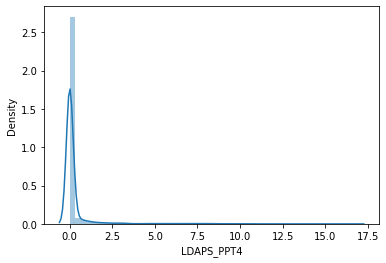

In [38]:
sns.distplot(df["LDAPS_PPT4"])

skewness is present in the "LDAPS_PPT4" column

<AxesSubplot:xlabel='Solar radiation', ylabel='Density'>

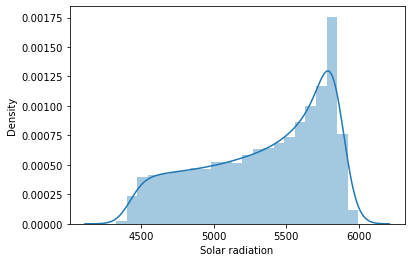

In [41]:
sns.distplot(df["Solar radiation"])

skewness is present in the "Solar radiation" column

<AxesSubplot:xlabel='Next_Tmax', ylabel='Density'>

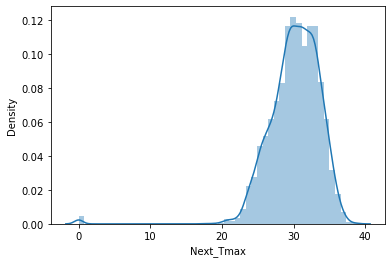

In [42]:
sns.distplot(df["Next_Tmax"])

skewness is present in "Next_Tmax"

<AxesSubplot:xlabel='Next_Tmin', ylabel='Density'>

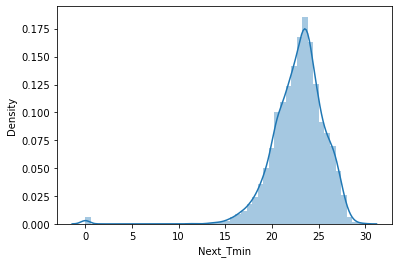

In [43]:
sns.distplot(df["Next_Tmin"])

skewness is present in "Next_Tmin"

# TO CHECK THE FREQUENCY OF THE DATA IN THE COLUMNS

### UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='station', ylabel='Count'>

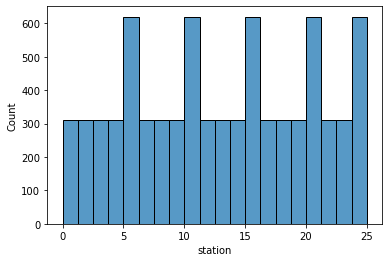

In [46]:
sns.histplot(df["station"],bins=20)

Data spread in column "station" is from 0 to 25

<AxesSubplot:xlabel='Date', ylabel='Count'>

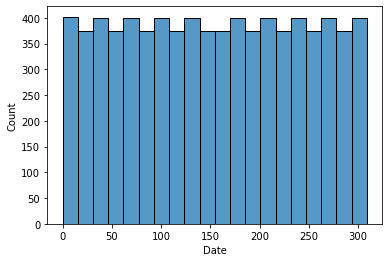

In [47]:
sns.histplot(df["Date"],bins=20)

Data spread in column "Date" is from 0 to 300

<AxesSubplot:xlabel='Present_Tmax', ylabel='Count'>

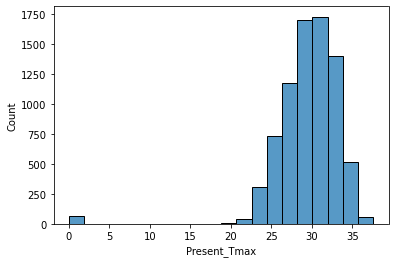

In [48]:
sns.histplot(df["Present_Tmax"],bins=20)

Data spread in column "Present_Tmax" is from 0 to 35

<AxesSubplot:xlabel='Present_Tmin', ylabel='Count'>

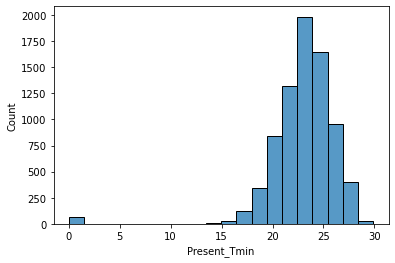

In [49]:
sns.histplot(df["Present_Tmin"],bins=20)

Data spread in column "Present_Tmin" is from 0 to 30

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Count'>

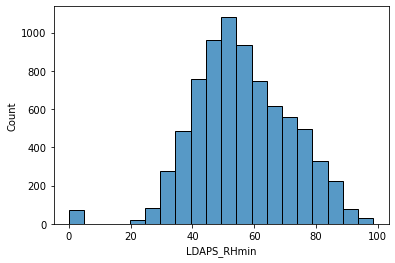

In [50]:
sns.histplot(df["LDAPS_RHmin"],bins=20)

Data spread in column "LDAPS_RHmin" is from 0 to 100

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Count'>

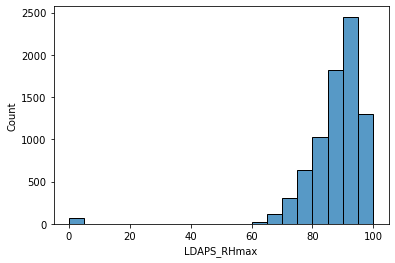

In [51]:
sns.histplot(df["LDAPS_RHmax"],bins=20)

Data spread in column "LDAPS_RHmax" is from 0 to 100

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Count'>

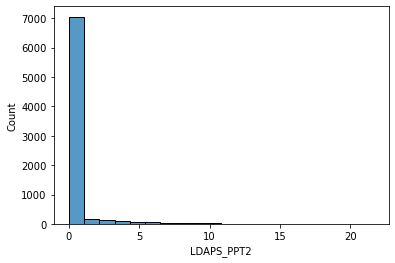

In [53]:
sns.histplot(df["LDAPS_PPT2"],bins=20)

Data spread in column "LDAPS_PPT2" is from 0 to 10

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Count'>

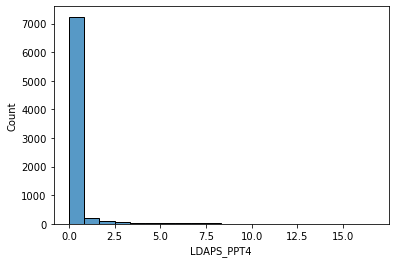

In [54]:
sns.histplot(df["LDAPS_PPT4"],bins=20)

Data spread in column "LDAPS_PPT4" is from 0 to 8.0

<AxesSubplot:xlabel='lat', ylabel='Count'>

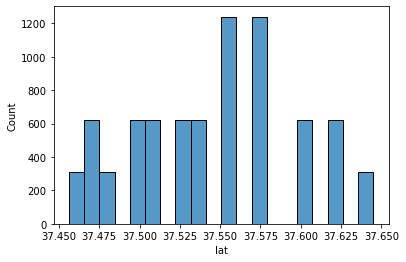

In [55]:
sns.histplot(df["lat"],bins=20)

Data spread in column "lat" is from 37.450 to 37.650

<AxesSubplot:xlabel='Next_Tmax', ylabel='Count'>

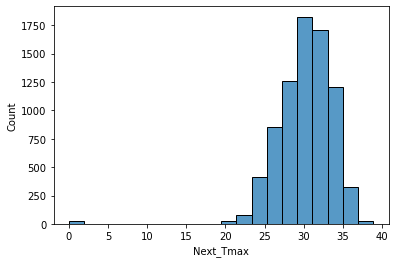

In [56]:
sns.histplot(df["Next_Tmax"],bins=20)

Data spread in column "Next_Tmax" is from 0 to 40

<AxesSubplot:xlabel='Next_Tmin', ylabel='Count'>

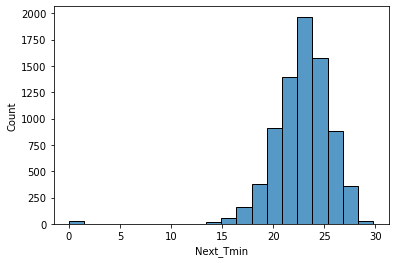

In [57]:
sns.histplot(df["Next_Tmin"],bins=20)

Data spread in column "Next_Tmin" is from 0 to 30

# TO CHECK THE RELATION OF EACH COLUMN TARGET VARIABLE

<AxesSubplot:xlabel='station', ylabel='Next_Tmax'>

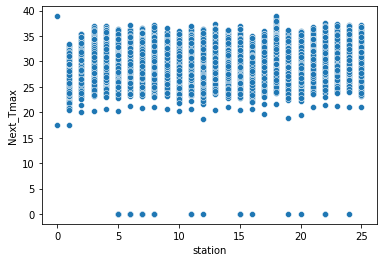

In [59]:
sns.scatterplot(x="station",y="Next_Tmax",data=df)

High Data spread is 0 to 25

<AxesSubplot:xlabel='Date', ylabel='Next_Tmax'>

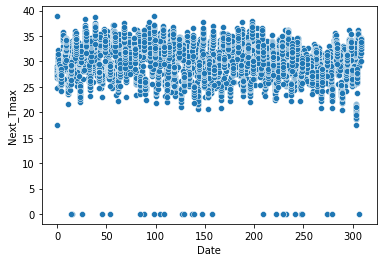

In [60]:
sns.scatterplot(x="Date",y="Next_Tmax",data=df)

High Data spread is 0 to 300

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmax'>

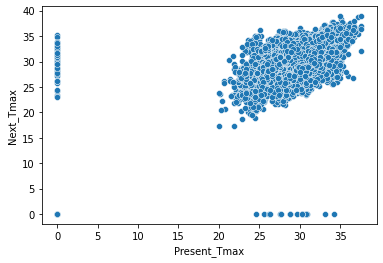

In [61]:
sns.scatterplot(x="Present_Tmax",y="Next_Tmax",data=df)

High Data spread is 0 to 40

<AxesSubplot:xlabel='Present_Tmin', ylabel='Next_Tmax'>

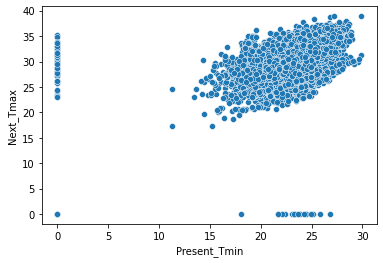

In [62]:
sns.scatterplot(x="Present_Tmin",y="Next_Tmax",data=df)

High Data spread is 0 to 30

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Next_Tmax'>

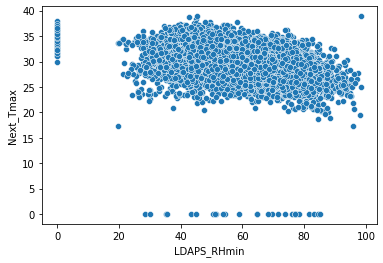

In [63]:
sns.scatterplot(x="LDAPS_RHmin",y="Next_Tmax",data=df)

High Data spread is 0 to 100

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Next_Tmax'>

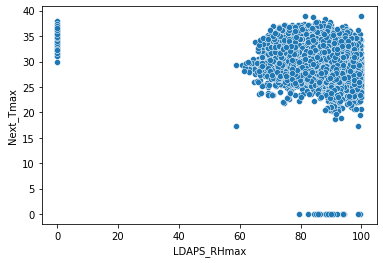

In [64]:
sns.scatterplot(x="LDAPS_RHmax",y="Next_Tmax",data=df)

High Data spread is 0 to 100

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Next_Tmax'>

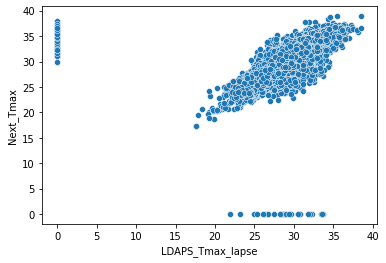

In [65]:
sns.scatterplot(x="LDAPS_Tmax_lapse",y="Next_Tmax",data=df)

High Data spread is 0 to 40

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Next_Tmax'>

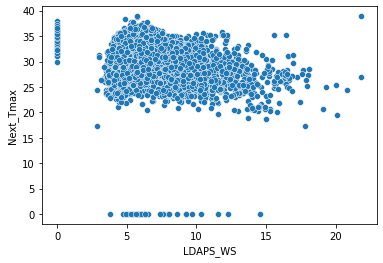

In [66]:
sns.scatterplot(x="LDAPS_WS",y="Next_Tmax",data=df)

High Data spread is 0 to 25

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Next_Tmin'>

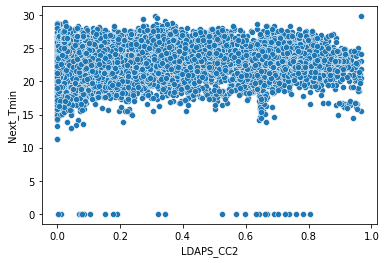

In [67]:
sns.scatterplot(x="LDAPS_CC2",y="Next_Tmin",data=df)

High Data spread is 0 to 1.0

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Next_Tmin'>

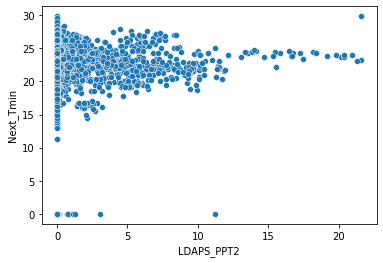

In [68]:
sns.scatterplot(x="LDAPS_PPT2",y="Next_Tmin",data=df)

High Data spread is 0 to 25

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Next_Tmin'>

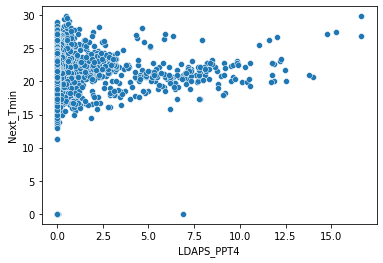

In [69]:
sns.scatterplot(x="LDAPS_PPT4",y="Next_Tmin",data=df)

High Data spread is 0 to 16.0

<AxesSubplot:xlabel='lat', ylabel='Next_Tmin'>

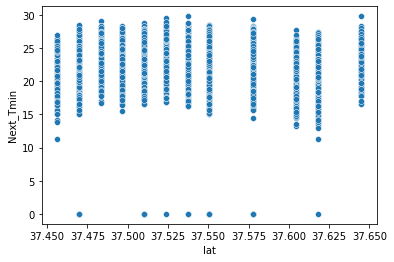

In [70]:
sns.scatterplot(x="lat",y="Next_Tmin",data=df)

High Data spread is 37.450 to 37.650

<AxesSubplot:xlabel='lon', ylabel='Next_Tmin'>

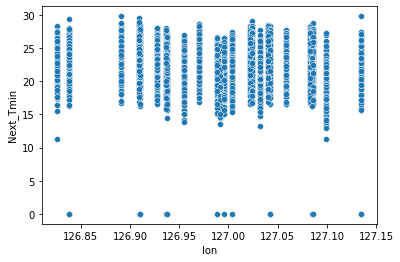

In [71]:
sns.scatterplot(x="lon",y="Next_Tmin",data=df)

High Data spread is 126.85 to 127.15

<AxesSubplot:xlabel='Solar radiation', ylabel='Next_Tmin'>

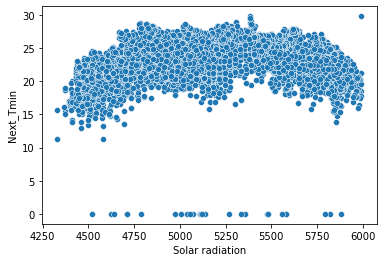

In [72]:
sns.scatterplot(x="Solar radiation",y="Next_Tmin",data=df)

High Data spread is 4250 to 6000

# TO CHECK THE RELATION BETWEEN ALL THE COLUMNS

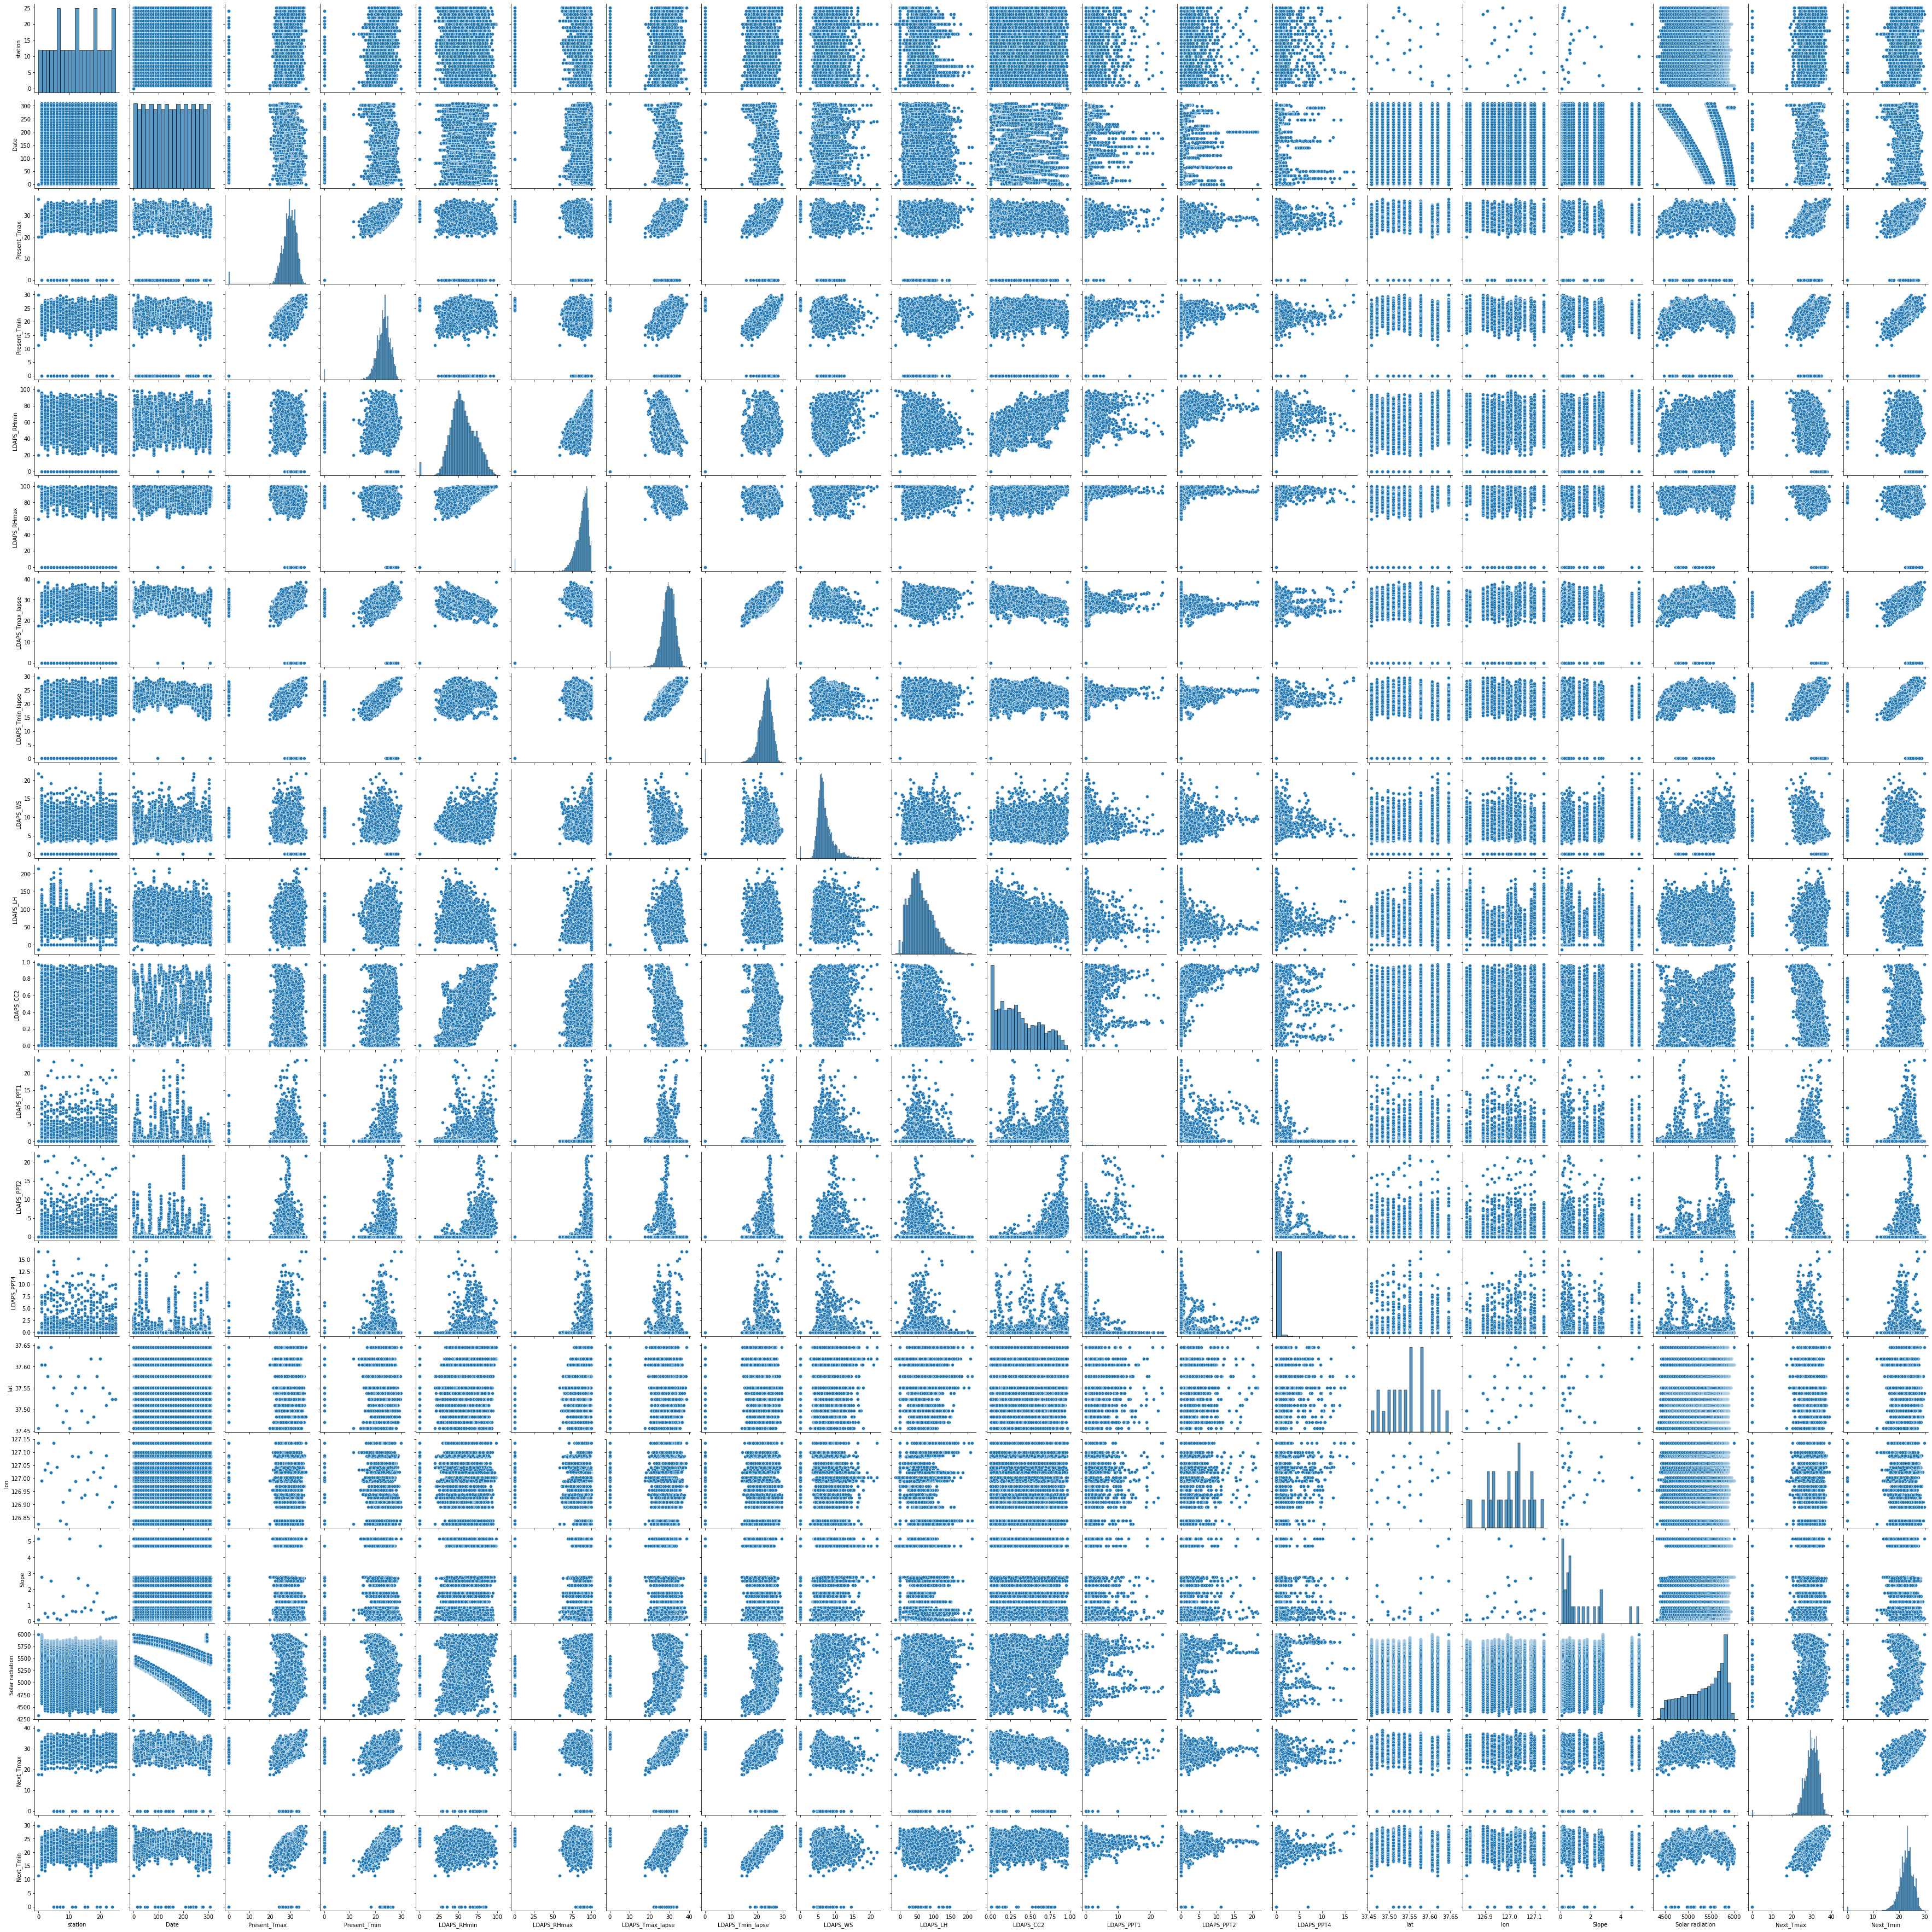

In [74]:
sns.pairplot(df)

# REMOVING OUTLIERS

In [76]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.663153  , 1.51421425, 0.1957961 , ..., 1.51793488, 0.29740687,
        0.58451712],
       [1.52451817, 1.51421425, 0.58796965, ..., 1.22994952, 0.09192733,
        0.12464283],
       [1.38588334, 1.51421425, 0.51449161, ..., 1.21653443, 0.25878484,
        0.37060639],
       ...,
       [1.66408295, 1.67061842, 1.54289349, ..., 2.0743251 , 0.65893149,
        1.92876502],
       [1.80178783, 1.72558643, 2.32665924, ..., 2.35821196, 3.5511284 ,
        4.08663665],
       [1.80178783, 1.72558643, 1.9840524 , ..., 1.51793488, 2.42793253,
        2.45772814]])

In [77]:
threshold=3
print(np.where(z>3))

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64), array([ 8, 12, 12, ..., 11, 12, 13], dtype=int64))


In [78]:
df_new=df[(z<3).all(axis=1)]
df_new

station   Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0  290.0          28.7          21.4    58.255688    91.116364   
1         2.0  290.0          31.9          21.6    52.263397    90.604721   
2         3.0  290.0          31.6          23.3    48.690479    83.973587   
3         4.0  290.0          32.0          23.4    58.239788    96.483688   
4         5.0  290.0          31.4          21.9    56.174095    90.155128   
...       ...    ...           ...           ...          ...          ...   
7745     21.0  304.0          23.1          17.8    24.688997    78.261383   
7746     22.0  304.0          22.5          17.4    30.094858    83.690018   
7747     23.0  304.0          23.3          17.1    26.741310    78.869858   
7748     24.0  304.0          23.3          17.7    24.040634    77.294975   
7749     25.0  304.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC2  \
0            28.074101         23.006936  6.818887   69.451805   0.203896   
1            29.850689         24.035009  5.691890   51.937448   0.251771   
2            30.091292         24.565633  6.138224   20.573050   0.257469   
3            29.704629         23.326177  5.650050   65.727144   0.226002   
4            29.113934         23.486480  5.735004  107.965535   0.249995   
...                ...               ...       ...         ...        ...   
7745         27.812697         18.303014  6.603253    9.614074   0.030169   
7746         26.704905         17.814038  5.768083   82.146707   0.024518   
7747         26.352081         18.775678  6.148918   72.058294   0.081035   
7748         27.010193         18.733519  6.542819   47.241457   0.074962   
7749         27.939516         18.522965  7.289264    9.090034   0.059869   

      LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT4      lat      lon   Slope  \
0            0.0         0.0         0.0  37.6046  126.991  2.7850   
1            0.0         0.0         0.0  37.6046  127.032  0.5141   
2            0.0         0.0         0.0  37.5776  127.058  0.2661   
3            0.0         0.0         0.0  37.6450  127.022  2.5348   
4            0.0         0.0         0.0  37.5507  127.135  0.5055   
...          ...         ...         ...      ...      ...     ...   
7745         0.0         0.0         0.0  37.5507  127.040  0.5721   
7746         0.0         0.0         0.0  37.5102  127.086  0.1332   
7747         0.0         0.0         0.0  37.5372  126.891  0.1554   
7748         0.0         0.0         0.0  37.5237  126.909  0.2223   
7749         0.0         0.0         0.0  37.5237  126.970  0.2713   

      Solar radiation  Next_Tmax  Next_Tmin  
0         5992.895996       29.1       21.2  
1         5869.312500       30.5       22.5  
2         5863.555664       31.1       23.9  
3         5856.964844       31.7       24.3  
4         5859.552246       31.2       22.5  
...               ...        ...        ...  
7745      4456.024414       27.6       17.7  
7746      4441.803711       28.0       17.1  
7747      4443.313965       28.3       18.1  
7748      4438.373535       28.6       18.8  
7749      4451.345215       27.8       17.4  

[6969 rows x 20 columns]

In [79]:
df.shape

(7752, 20)

In [80]:
7752-6969

783

In [82]:
783/7752

0.1010061919504644

we have lost 10% data by removing outliers,so we r not going to continue with it

# DIVIDING THE COLUMNS AS x AND y

In [83]:
x=df.drop("Next_Tmax",axis=1)
y=df["Next_Tmax"]

# APPLYING variance_inflation_factor

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
x.shape[1]

19

In [86]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [87]:
vif_calc()

       VIF FACTOR          features
0        4.575554           station
1        5.075574              Date
2      186.350393      Present_Tmax
3      192.169108      Present_Tmin
4       85.266980       LDAPS_RHmin
5      236.957612       LDAPS_RHmax
6      581.513013  LDAPS_Tmax_lapse
7      613.947032  LDAPS_Tmin_lapse
8       13.075853          LDAPS_WS
9        6.051984          LDAPS_LH
10       9.120279         LDAPS_CC2
11       1.379118        LDAPS_PPT1
12       1.548759        LDAPS_PPT2
13       1.122760        LDAPS_PPT4
14  641995.527426               lat
15  640411.640848               lon
16       2.116324             Slope
17     209.263560   Solar radiation
18     149.489579         Next_Tmin


We need to drop "lat","LDAPS_PPT4","LDAPS_PPT2" columns as multicollinearity was present

In [88]:
df.drop(["lat","LDAPS_PPT4","LDAPS_PPT2"],axis=1,inplace=True)

In [89]:
df.shape

(7752, 17)

dropped columns are not present anymore

# REMOVING THE SKEWNESS 

In [90]:
df.skew()

station            -0.000115
Date                0.000009
Present_Tmax       -3.402987
Present_Tmin       -3.232442
LDAPS_RHmin        -0.113889
LDAPS_RHmax        -4.712138
LDAPS_Tmax_lapse   -3.457452
LDAPS_Tmin_lapse   -3.573353
LDAPS_WS            1.163684
LDAPS_LH            0.635208
LDAPS_CC2           0.474379
LDAPS_PPT1          5.395178
lon                -0.285213
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -2.213759
Next_Tmin          -2.049088
dtype: float64

In [91]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method="yeo-johnson")

In [92]:
x

array([[-1.85869053,  1.38847138, -0.38286055, ...,  1.31415303,
         1.8494304 , -0.72546232],
       [-1.64685803,  1.38847138,  0.67919194, ..., -0.38533562,
         1.40070208, -0.24173894],
       [-1.45344428,  1.38847138,  0.57121138, ..., -0.94916364,
         1.38064953,  0.33036844],
       ...,
       [ 1.54089808,  1.51037804, -1.77881838, ..., -0.93504362,
        -1.74476253, -1.89265632],
       [-2.10250661, -2.1324119 , -2.36914416, ..., -1.47726373,
        -1.88707057, -3.08617113],
       [-2.10250661, -2.1324119 ,  3.08619046, ...,  1.74216318,
         1.8494304 ,  3.36822802]])

Applied power_transform method to remove the skewness 

# APPLYING VARIOUS MODEL

In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=7)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# LinearRegression

In [95]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)

lr.score(x_train,y_train)

0.702218553321488

In [96]:
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print(r2_score(y_test,pred_test))

0.7016144194285103


By applying LinearRegression we are getting the accuracy of 0.70

# KNeighborsRegressor

In [97]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
pred_test=knr.predict(x_test)
print(r2_score(y_test,pred_test))

0.8113383202116672


By applying KNeighborsRegressor we are getting the accuracy of 0.81

# GradientBoostingRegressor

In [98]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred_test=gb.predict(x_test)
print(r2_score(y_test,pred_test))

0.8643400258647722


By applying GradientBoostingRegressor we are getting the accuracy of 0.86

# DecisionTreeRegressor

In [99]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_test=dtr.predict(x_test)
print(r2_score(y_test,pred_test))

0.7822294580657692


By applying DecisionTreeRegressor we are getting the accuracy of 0.78

# REGULARIZATION 

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [101]:
from sklearn.linear_model import Lasso 


parameters={"alpha":[.0001,.001,.01,.1,1,10],"random_state":list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [102]:
ls=Lasso(alpha=0.001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.7017648569711401

By applying Lasso we are getting the accuracy of 0.70

# CHECKING THE CROSS VALIDATION SCORE

In [103]:
from sklearn.model_selection import cross_val_score

In [104]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.641819330400133


In [105]:
print(cross_val_score(knr,x,y,cv=4).mean())

0.5439940977875343


In [106]:
print(cross_val_score(gb,x,y,cv=4).mean())

0.77330547839014


In [107]:
print(cross_val_score(dtr,x,y,cv=4).mean())

0.5766734944107674


In [108]:
print(cross_val_score(ls,x,y,cv=4).mean())

0.6443703214648133


# ENSEMBLE TECHNIQUE

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [110]:
parameters={"criterion":["mse","mae"],"max_features":["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [113]:
rf=RandomForestRegressor(criterion="mse",max_features="auto")

rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf=rf.predict(x_test)

rfs=r2_score(y_test,pred_rf)
print('R2_score:',rfs*100)


rfc=(cross_val_score(rf,x,y,cv=5).mean())
print("cross_val_score:",rfc*100)

R2_score: 91.04806832633379
cross_val_score: 77.26264255071527


As we can see RandomForestRegressor is giving the best accuracy score,hence we are going to save it

# SAVING THE BEST MODEL

In [114]:
import joblib
joblib.dump(rf,"best_rftemp1file.obj")

['best_rftemp1file.obj']

# DIVIDING THE COLUMNS AS dfx AND dfy

In [116]:
dfx=df.drop("Next_Tmin",axis=1)
dfy=df["Next_Tmin"]

# APPLYING VARIOUS MODEL

In [117]:
dfx_train,dfx_test,dfy_train,dfy_test=train_test_split(dfx,dfy,test_size=0.20,random_state=7)

# LinearRegression

In [118]:
lr2=LinearRegression()
lr2.fit(dfx_train,dfy_train)
predlr=lr2.predict(dfx_test)

lr2.score(dfx_train,dfy_train)

0.8111926963204196

In [119]:
lr2.fit(dfx_train,dfy_train)
pred_test=lr2.predict(dfx_test)
print(r2_score(dfy_test,pred_test))

0.8047990283741104


# GradientBoostingRegressor

In [120]:
from sklearn.ensemble import GradientBoostingRegressor
gb2=GradientBoostingRegressor()
gb2.fit(dfx_train,dfy_train)
pred_test=gb2.predict(dfx_test)
print(r2_score(dfy_test,pred_test))

0.9078942895185171


# DecisionTreeRegressor

In [121]:
from sklearn.tree import DecisionTreeRegressor
dtr2=DecisionTreeRegressor()
dtr2.fit(dfx_train,dfy_train)
pred_test=dtr2.predict(dfx_test)
print(r2_score(dfy_test,pred_test))

0.836237753814516


# SupportVectorRegressor

In [122]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(dfx_train,dfy_train)
svr.score(dfx_train,dfy_train)
pred_test=svr.predict(dfx_test)
print(r2_score(dfy_test,pred_test))

0.11175415801935917


# REGULARIZATION 

In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [124]:
from sklearn.linear_model import Lasso 


parameters={"alpha":[.0001,.001,.01,.1,1,10],"random_state":list(range(0,10))}
ls2=Lasso()
clf=GridSearchCV(ls2,parameters)
clf.fit(dfx_train,dfy_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [125]:
ls2=Lasso(alpha=0.0001,random_state=0)
ls2.fit(dfx_train,dfy_train)
ls2.score(dfx_train,dfy_train)
pred_ls=ls2.predict(dfx_test)

lss=r2_score(dfy_test,pred_ls)
lss

0.8047907206302062

# CHECKING THE CROSS VALIDATION SCORE

In [ ]:
from sklearn.model_selection import cross_val_score

In [129]:
print(cross_val_score(lr2,dfx,dfy,cv=4).mean())

0.7417769531842017


In [130]:
print(cross_val_score(dtr2,dfx,dfy,cv=4).mean())

0.6823887245547305


In [132]:
print(cross_val_score(svr,dfx,dfy,cv=4).mean())

-0.06451710415833725


In [133]:
print(cross_val_score(gb2,dfx,dfy,cv=4).mean())

0.8367385844386823


# ENSEMBLE TECHNIQUE

In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [127]:
parameters={"criterion":["mse","mae"],"max_features":["auto","sqrt","log2"]}
rf2=RandomForestRegressor()
clf=GridSearchCV(rf2,parameters)
clf.fit(dfx_train,dfy_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [128]:
rf2=RandomForestRegressor(criterion="mse",max_features="auto")

rf2.fit(dfx_train,dfy_train)
rf2.score(dfx_train,dfy_train)
pred_rf=rf2.predict(dfx_test)

rfs=r2_score(dfy_test,pred_rf)
print('R2_score:',rfs*100)


rfc=(cross_val_score(rf2,dfx,dfy,cv=5).mean())
print("cross_val_score:",rfc*100)

R2_score: 92.20960106153294
cross_val_score: 82.35457411618427


RandomForestRegressor is giving the best accuracy score,hence we will save it as best model

# SAVING THE BEST MODEL

In [134]:
import joblib
joblib.dump(rf,"best_rf2temp1file.obj")

['best_rf2temp1file.obj']